# **Statistical Tests**

**1 Introduction**

The purpose of a Statistical test is to check a hypothesis or a prediction about a population parameter using an estimate of that parameter calculated from a sample of the population.
These tests have many applications in business. For instance
>	Has a marketing campaign increased a company’s sales figures?

>	Has a marketing campaign increased a company’s market share?
In many business examples tests are used to examine differences between groups.

>Do males and females spend the same amount on magazines?

>Are urban or rural consumers more likely to buy a product?

>Do consumers in France, Germany, Ireland and the UK have different views on what is important when buying a car?

**Why do we need statistical tests?**

Consider the results of a survey that show that a sample of males spent an average of €20 a week on magazines and that a sample of females spent an average of €21 a week on magazines.

Does this prove that females spend more on magazines on average?

Not necessarily because we know that both results are only sample estimates. It is not possible to directly prove or disprove an hypothesis using sample estimates alone, because these statistics will have inherent sample errors.

So we need some technique or techniques to help us decide whether a sample parameter provides enough evidence to prove a hypothesis about the population parameter. These techniques are called statistical tests or hypothesis tests.

These tests are designed to check if the sample results observed are statistically significant.  Put simply, in the example above we would like to know if the difference between males and females was due to random chance or due to a significant difference in expenditure between them.




# **2 Steps involved in a Statistical Test**

**(i) State the Null and Alternative Hypotheses**

The first step is to outline the objectives of the test. The Null and Alternative Hypothesis are opposing statements about the population parameter being tested. In general the researcher is trying to prove the Alternative Hypothesis by showing that the Null Hypothesis is false.
For instance, consider HR Research Ltd. who are examining pay rates in two different sectors, A and B, to test if there is a differences between them using a sample of employees from both sectors. In this case the Null Hypothesis would state that the Average Salaries in both sectors are equal, while the Alternative would state that the Average Salaries are not equal.

Mathematically this can be written as

Null
 	$H_0$: $\mu_{a} $  = $\mu_{b} $  or  $\mu_{a}-\mu_{b} $ = 0 (Average Salary is equal in both sectors)

Alternative
$H_1$: $\mu_{a} <> \mu_{b}$ or $\mu_{a} - \mu_{b} <> 0$ (Average Salary is not equal in both sectors)

<br/>


**ii)	Set the precision level**

At the initial stage the researcher will also set the level of precision for the test. This is the level of confidence the researcher wishes to achieve before rejecting the null hypothesis.
The 95% confidence level is the accepted norm in Social Science and Business Research although occasionally some researchers will use other levels (99%, 90% etc.). Note we can never be 100% confident about a sample result.

<br/>

**(iii)	Gather sample data and calculate sample statistics**

To test the hypothesis a sample of data is selected from the population and the relevant sample statistics (mean, standard deviation, proportion etc.) are calculated.
In the HR Research example, they would need to calculate the relevant descriptive statistics for the problem. In this case they would need the sample means, sample standard deviations and sample sizes.

$\bar{X}_a =$ €$30500$	$\bar{X}_b	  =$ €$30,000$

$S_A   =$ €$9,400$		$S_B   =$ €$8,900		$

$ n_A= 100$		 $n_B = 100$

<br/>


The t-statistic can be calculated using the following formula:
![probabiltiy_example](https://www.computing.dcu.ie/~amccarren/mcm_images/2_sample_t_test.png)



with df=$n_x+n_y-2$

The simple python code for the above example is shown below. Vary $N_a$ and $N_b$ and see what happens.

In [2]:
import numpy as np
from scipy import stats




## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = 9200**2
var_b = 8900**2

#std deviation
s = np.sqrt((var_a + var_b)/2)

Na=100
Nb=100

## Calculate the t-statistics
t = (30500 - 30200)/(np.sqrt((var_a/Na)+(var_b/Nb)))



## Compare with the critical t-value
#Degrees of freedom
df = Na+Nb - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))

t = 0.2343678477700284
p = 0.8149415877676636


You will notice as $N_a$ and $N_b$ increase we get a lower p value. This means as sample size increase we have a greater condfidence that there is a difference between the samples.

The following code calculates the p value manually and using a scipy function.

In [ ]:
# Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.846315522145108
p = 0.0011827853416983558
t = 3.846315522145108
p = 0.0011827853416984866


**(iv)	Choose the appropriate Statistical Test**

To find the appropriate test, we must look at the type of variable we are testing and what the test is actually trying to show.
In the HR Research example, they are looking at a difference in salaries, so the test variable is Salary, which is a Ratio variable. They are trying to compare the salaries in two sectors, A and B, so the test is a measure of the difference between 2 groups. The appropriate test for this problem type is called an Independent Sample t-Test.
We will look at a sample of some of the more widely used tests later in this section

<br/>

**(v)	Calculate the Test Statistic**

To test the Null Hypothesis, the difference between the hypothesised value of the parameter and the sample value of the parameter is calculated.
For instance, The Null hypothesis for the HR Research problem stated that the difference between salaries in the two sectors is equal to zero.
However they found in a survey that respondents in Sector A were earning on average €500 more than the respondents in Sector B.
In order to test if this difference is statistically significant we calculate a test statistic (in this case a t-value) which is, put simply, a measure of the relative size of the difference taking into account the amount of variation in the data and the sample size.
The t-value for the HR Research data is equal to .386
At the end of this section, we will briefly look at how two of these test statistics are calculated, but in general this calculation is performed using appropriate statistical software.

<br/>

**(vi)	Interpret the Results of the Test / Examine the P-value**

Unfortunately there are a large number of test statistics and they are not always easy to interpret, without a detailed knowledge of how the particular test works. What for instance does a t-value equal to .386 tell us?
Fortunately, due to developments in statistical software, there is a simpler way of interpreting the results of a statistical test, by using what is called the p-value of the test, which is common to all tests.

The p-value measures the probability of calculating the observed sample value if the Null Hypothesis was in fact true.

The decision to reject or “accept” the null hypothesis (to test if it is false) can be made by examining the p-value.
Quite simply, if the p-value is less than .05 then there is less than 5% of a chance that the Null Hypothesis is true and conversely more than a 95% chance that is false, so it can be rejected with 95% confidence.
However if it is above .05, then the Null Hypothesis cannot be rejected at this level.
The p-value for the HR Research study was .7, so we cannot reject the null hypothesis, which put simply, indicates that there is no evidence to suggest that there are significant salary differences between Sectors A and B.




# **3 Summary of Statistical Tests for Differences**

Here is a list of some of the more widely used tests in Business and where they should be applied.

**Tests for Differences Between Two Independent Groups**

Test Variable		Statistical Test
  
Nominal Variable	- 	Chi-Square Test

Ratio Variable 	- 	Independent Sample T-Test/Z-Test*

Ordinal Variable	-	Mann-Whitney U Test

<br/>


**Difference Between N>2 – Independent Groups**

Test Variable			Statistical Test

Nominal Variable	-	Chi-Square Test

Ratio Variable		- 	One – Way ANOVA*

Ordinal Variable	-	Kruskal – Wallis


# **4 Assumptions underlying statistical tests**

Most statistical tests have a number of assumptions underlying them. It is important to check these assumptions when using a test. Violations in assumptions can lead to incorrect conclusions being made, when interpreting the test results.

**Parametric Tests (Normality assumption)**

*The T-Tests and One-way Anova are from a family of tests called parametric tests, which are based on the assumption, that the test variable is Normally distributed.
This means that strictly speaking parametric tests can only be used for ratio/interval variables, that follow a Normal Distribution. This assumption is relaxed for sample statistics calculated from a large sample (n>50), but for smaller samples, the normality of the variable should be tested before using a parametric test.
If they are not Normal the non-parametric equivalent (Mann-Whitney U Test or Kruskal Wallis) should be used instead.


**Sample Size Requirements**

Sample size is also an important factor. Clearly the bigger the sample size the more powerful the test and the more likely we are to identify statistically significant results. As well as looking at the overall sample size we need to look at the sample sizes in each group as well.

- The strict minimum per group for a statistical test is 3, however the practical minimum will be higher for most tests.
- The minimum sample size per group recommended for the parametric tests is 10.
- There are similar requirements for non-parametric tests.
- The Chi-Square assumes an expected minimum sample size of 5 in each cell. If this assumption is violated it can affect the validity of the test. PASW/SPSS indicates how many cells violate this assumption.

Sometimes it is necessary to collapse groups or remove a group from an analysis, if the small size within the group is too small.
Consider a class where there are 40 students; 15 from Ireland, 15 from the UK, 4 from Germany, 4 from France and 2 from Spain.
We cannot conduct a One Way ANOVA on the five groups due to small sample sizes. However we may decide to either just compare the Irish and UK students or combine the French, German and Spanish students into a third group.


**Independent Observations**

The independence assumption is one of the most important and can have the most detrimental effects on the test results. All of the tests we examined here require independent measurements. In other words each data point must be independent of the others.

For instance, if we have a set of monthly sales figures for a product, we cannot say that these are independent as clearly last month’s sales will have an impact on this month’s sales.

This is only a sample of the issues involved in testing assumptions. It can be a complex issue as there will always be some violations of these assumptions, so we need to look at the size and nature of the violations. There are also differing views in different disciplines as to how these violations should be tackled.





## 5 Chi-Square Test  $\chi{2}$

The Chi-Square Test is used when examining the difference between two or more groups and the test variable is Nominal. Example 7.2 illustrates the use of this test. It can also be seen as a test that measures the relationship between two nominal variables.

**Example 7.2**

The following table shows the breakdown of students by gender and mode of transport to college.
Tables:

>Mode of Transport | 	Male | 	Female	 | Total
>--- | --- | --- | ---
>Bus | 80	| 220	| 300
>Walk| 50	| 50	| 10  
>Bicycle | 40 |	10 |	50
>Car |	30 |	20 |	50
>Total |	200 |	300 |	500

Does this data suggest that males and females use different modes of transport to get to college?
The test variable in this example is mode of transport, which is a Nominal variable. We are examining the difference between two groups; males and females, so the appropriate test is the Chi-Square Test.

This test is a little more complex than the Z-test and involves four steps.


(i) **State the Null and Alternative Hypotheses**


$H_0$: Males and Females use the same modes of transport to get to college

$H_1$: Males and Females do not use the same modes of transport to get to college

<br/>

(ii) **Calculate the Expected values**

The Expected values are the values we would expect to get form the survey if the Null Hypothesis was true.

For instance if there was no difference between males and females, how many males would we expect to take the bus?
300 students out of 500 take the bus, which is equal to 60%(.6) of the students, so if there was no difference between the genders, we would expect 60% of males and 60% of females to take the bus. So

<br/>

(ii) **Calculate the Expected values**

The Expected values are the values we would expect to get form the survey if the Null Hypothesis was true.

For instance if there was no difference between males and females, how many males would we expect to take the bus?
300 students out of 500 take the bus, which is equal to 60%(.6) of the students, so if there was no difference between the genders, we would expect 60% of males and 60% of females to take the bus. So

$E(Bus-Male) = 200$x$300/500=120$

$E (Bus-Female) =  300$x$300/500=180$

We can calculate the rest of the expected values using the same formula
$E( A and B) =n_a$.$n_b/n$   where

$n_a$ =Number in category A,
$n_b$ =Number in category B.

$n$ = Total number in sample

<br/>

**iii) Calulate the Chi-Square Value**

The next step is to calculate the difference between the values observed(Oi) in our survey and the expected theoretical values(Ei) using the following formula

>>>$\chi{2}$=  $ \frac{\sum_{i=1}^n (O_i-E_i)}{E_i}$
   
   
The Chi-Square provides a measure of the average relative squared differences between the observed and expected values.

The simplest way to calculate the Chi-Square statistic is to set up the following table.


In [4]:
import numpy as np
#a1 = [80, 220]
#a2 = [50, 50]
#a3 = [40, 10]
#a4 = [30,20]

a1 = [20, 13]
a2 = [48, 96]
#a3 = [40, 10]
#a4 = [30,20]

#transport = np.array([a1, a2, a3, a4])
transport = np.array([a1, a2])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(transport)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
7.327160463069713


===Degrees of Freedom===
1


===P-Value===
0.006792027166233424


===Contingency Table===
[[12.6779661 20.3220339]
 [55.3220339 88.6779661]]


So lets interpret these results. The Chi2-stat is basically the $\chi{2}$ statistic in the above formula.The degrees of freedom is calculated by the following formula:

$(Rows-1)$.$(Columns-1)$$=(4-1).(2-1)=3$

The p-value is really small and is <0.05.This tells us that the difference between the males and females is well beyond what we would expect to get due to random chance. We can therefore reject the null hypothesis and accept the alternative, that there is a significant difference between males and females.  



# **6 Analysis of Variance (ANOVA)**

**What is ANOVA (ANalysis Of VAriance)?**

An ANOVA is generally used when we are comparing more than 2 groups for an outcome variable. In section 2 we compared the means from 2 samples taken from 2 distinct groups. We used a t-test to determine if would accept or reject the Null hypothesis.

Null Hypothesis was
 	$H_0$: $\mu_{a} $  = $\mu_{b} $  or  $\mu_{a}-\mu_{b} $ = 0 (Average Salary is equal in both sectors)

Alternative Hypothesis was
$H_1$: $\mu_{a} <> \mu_{b}$ or $\mu_{a} - \mu_{b} <> 0$ (Average Salary is not equal in both sectors)

<br/>

With an ANOVA we are extending this principal at its simplest level to more than 2 groups. So now our questions would be is the mean of each group the same and our Null hypothesis would be :

$H_0$: $\mu_{a} $  = $\mu_{b} = \mu_{c} =\mu_{d}$

and the alternative implies that at least one meand is different from other groups:

$H_0$: $\mu_{a} $  <> $\mu_{b} <> \mu_{c} <>\mu_{d}$

This is a one factor analysis and it can be extended to multi faxtor studies with covariate variables, but more on this when we talk about Generalised Linear Models(GLM)

ANOVA Assumptions

*   Residuals (experimental error) are normally distributed (Shapiro Wilks Test)
*   Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
*   Observations are sampled independently from each other

Lets look at a dataset which gives medical data for 4 different groups of patients.







groups mean differences inferred by analyzing variances
Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
Note: In ANOVA, group, factors, and independent variables are similar terms.


Check sample sizes: equal number of observation in each group
Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
Calculate Mean Square error (MSE) (SS error/df of residuals)
Calculate F-value (MS of group/MSE)

               A          B          C          D
count   5.000000   5.000000   5.000000   5.000000
mean   29.600000  45.000000  31.200000  60.000000
std     4.037326  11.202678   3.898718   8.514693
min    25.000000  29.000000  27.000000  51.000000
25%    28.000000  40.000000  29.000000  54.000000
50%    29.000000  45.000000  30.000000  60.000000
75%    30.000000  55.000000  33.000000  62.000000
max    36.000000  56.000000  37.000000  73.000000


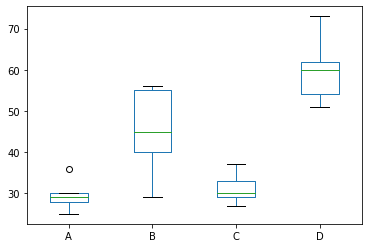

In [ ]:
import pandas as pd
# load data file

d = pd.read_csv("https://www.reneshbedre.com/assets/posts/anova/onewayanova.txt", sep="\t")
print(d.describe())
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

You can see from the boxplot that groups A and C are quite similar. However, group D does seem to be quite a bit away from A,B ad C, but is this statistically significant. ANOVA basically works by grouping the between group variation with the within group variation. If the within group variation is really small and the between group variation is really large then we can intuitively understand that there is a difference between the groups. When we compare these 2 statistics and they will follow a F distribution as long as the assumptions outlined earlier are met.

Lets complete the ANOVA analysis below:



In [ ]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


From the analysis above we can see that the $F_{3,16}$ ratio is 16.429 with a P-value of 0.000026. This tells us that there is sufficent evidence to reject the null hypothesis and that we can accept the alternative hypothesis that at least one of groups has a different mean. The following code does a pairwise comparison between each group.


In [ ]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   1.6929 29.1071   True
     A      C      1.6    0.9 -12.1071 15.3071  False
     A      D     30.4  0.001  16.6929 44.1071   True
     B      C    -13.8 0.0482 -27.5071 -0.0929   True
     B      D     15.0 0.0296   1.2929 28.7071   True
     C      D     28.8  0.001  15.0929 42.5071   True
-----------------------------------------------------


The Tukey HSD takes allows us to complete what is known as a post hoc tests. These test will do all the pairwise comparisons between all the groups. There are 6 comparisons and in only one case do we accept (A vs C) the null hytpothesis.

The next test we will complete here is to check the Homogeneity of variances. This is important as one of the assumptions we made was the variance within each groups was relatively constant across groups. the levnee test is used and the code to demostrate it is shown below.



In [ ]:
import scipy.stats as stats
w, pvalue = stats.levene(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

1.9219593192195938 0.16673281219949276


The Levene statistic is 1.9219 and the P-value is 0.166. This implies that we cannot reject the null hypothesis for this test which asks are the variances constant across the groups.

The final test we will conduct is the Sharpiro Wilks test. The null hypothesis for this test is that the errors for the model in the OLS function are from a normal distribution.


In [ ]:
# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


Again the p-value is 0.7229 which is non-significant and implies we should accept the null hypothesis and the errors come from a normal distribution.